In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

In [2]:
data = pd.read_csv("diabetes.csv")


In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.NaN)


In [9]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [10]:
data['Glucose'] = data['Glucose'].replace(np.NaN, data['Glucose'].mean())
data['BloodPressure'] = data['BloodPressure'].replace( np.NaN,data['BloodPressure'].mean())
data['SkinThickness'] = data['SkinThickness'].replace( np.NaN,data['SkinThickness'].mean())
data['Insulin'] = data['Insulin'].replace( np.NaN,data['Insulin'].mean())
data['BMI'] = data['BMI'].replace( np.NaN,data['BMI'].mean())



In [11]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

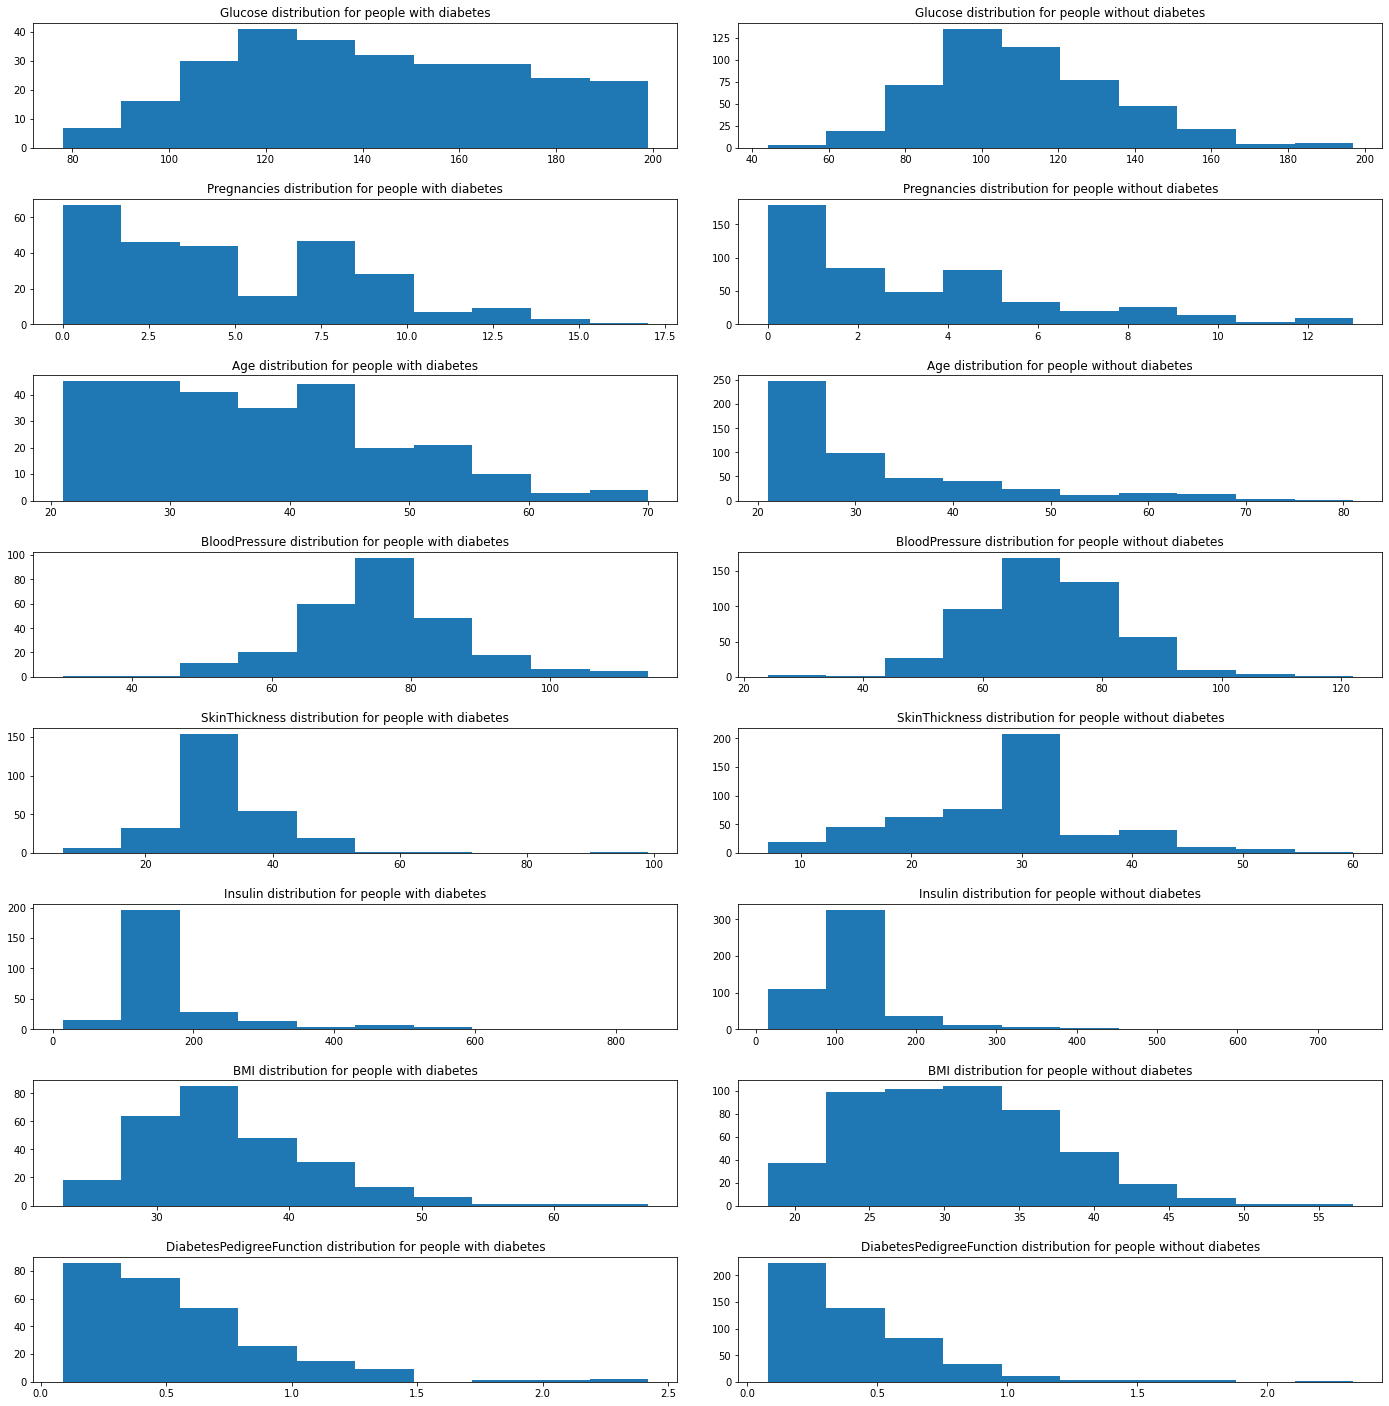

In [13]:
fig, ax = plt.subplots(nrows=8, ncols=2, figsize=(20, 20))
fig.tight_layout(pad=3.0)
ax[0,0].set_title('Glucose distribution for people with diabetes')
ax[0,0].hist(data.Glucose[data.Outcome==1]);
ax[0,1].set_title('Glucose distribution for people without diabetes')
ax[0,1].hist(data.Glucose[data.Outcome==0]);
ax[1,0].set_title('Pregnancies distribution for people with diabetes')
ax[1,0].hist(data.Pregnancies[data.Outcome==1]);
ax[1,1].set_title('Pregnancies distribution for people without diabetes')
ax[1,1].hist(data.Pregnancies[data.Outcome==0]);
ax[2,0].set_title('Age distribution for people with diabetes')
ax[2,0].hist(data.Age[data.Outcome==1]);
ax[2,1].set_title('Age distribution for people without diabetes')
ax[2,1].hist(data.Age[data.Outcome==0]);
ax[3,0].set_title('BloodPressure distribution for people with diabetes')
ax[3,0].hist(data.BloodPressure[data.Outcome==1]);
ax[3,1].set_title('BloodPressure distribution for people without diabetes')
ax[3,1].hist(data.BloodPressure[data.Outcome==0]);
ax[4,0].set_title('SkinThickness distribution for people with diabetes')
ax[4,0].hist(data.SkinThickness[data.Outcome==1]);
ax[4,1].set_title('SkinThickness distribution for people without diabetes')
ax[4,1].hist(data.SkinThickness[data.Outcome==0]);
ax[5,0].set_title('Insulin distribution for people with diabetes')
ax[5,0].hist(data.Insulin[data.Outcome==1]);
ax[5,1].set_title('Insulin distribution for people without diabetes')
ax[5,1].hist(data.Insulin[data.Outcome==0]);
ax[6,0].set_title('BMI distribution for people with diabetes')
ax[6,0].hist(data.BMI[data.Outcome==1]);
ax[6,1].set_title('BMI distribution for people without diabetes')
ax[6,1].hist(data.BMI[data.Outcome==0]);
ax[7,0].set_title('DiabetesPedigreeFunction distribution for people with diabetes')
ax[7,0].hist(data.DiabetesPedigreeFunction[data.Outcome==1]);
ax[7,1].set_title('DiabetesPedigreeFunction distribution for people without diabetes')
ax[7,1].hist(data.DiabetesPedigreeFunction[data.Outcome==0]);


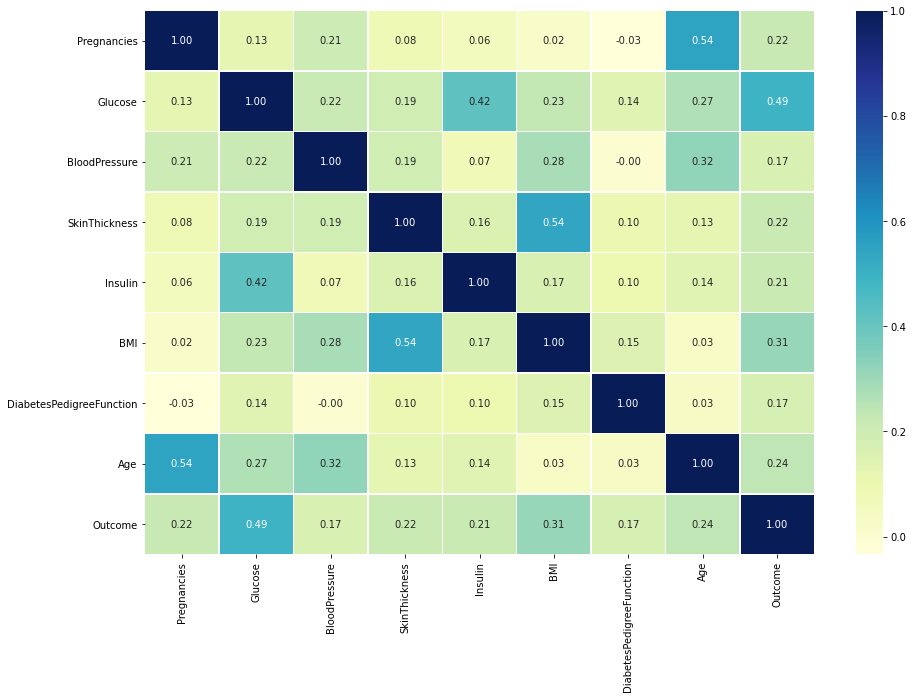

In [14]:
corr_matrix = data.corr()
fig,ax = plt.subplots(figsize=(15,10)) 
ax = sns.heatmap(corr_matrix,annot=True,linewidth=0.5,fmt=".2f",cmap="YlGnBu")

In [15]:
X = data.drop("Outcome",axis=1)
y = data["Outcome"]
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.3)

In [23]:
log_reg = LogisticRegression(random_state=0)
a=log_reg.fit(X_train,y_train);
## Evaluating the model
log_reg = log_reg.score(X_test,y_test)
log_reg

C:\Users\nagam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7878787878787878

In [17]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train);
## Evaluating the model
knn = knn.score(X_test,y_test)
knn

0.7142857142857143

In [18]:
clf= RandomForestClassifier()
clf.fit(X_train,y_train);
## Evaluating the model
clf = clf.score(X_test,y_test)
clf

0.7748917748917749

In [19]:
lrs = LinearRegression()
lrs.fit(X_train, y_train)
lrs=lrs.score(X_test,y_test)
lrs

0.3463539253560516

In [20]:
svm = svm.SVC()
svm.fit(X_train,y_train)
## Evaluating the model
svm = svm.score(X_test,y_test)
svm

0.7705627705627706

In [21]:
nb=GaussianNB()
nb.fit(X_train,y_train)
nb = nb.score(X_test,y_test)
nb

0.8008658008658008

In [22]:
import pickle

pickle.dump(a, open("Diabetes.pkl", "wb"))